<a href="https://colab.research.google.com/github/mgu83/cpen355-assignment/blob/main/CPEN_355_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CPEN 335: Assignment 1

Maggie Gu
37174844

In [ ]:
# Question 1

from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Print out the parameters for dataset
X, y = mnist.data, mnist.target
print(X.shape, y.shape)

(70000, 784) (70000,)


X: This is a 2D array of 70000 by 784, with row representing represents a flattened 28x28 pixel image of a handwritten digit (0-9). Each of the 784 columns corresponds to a pixel intensity value (from 0 to 255).

y: This is a 1D array of length 70000, where each entry is a label (0-9) corresponding to the digit in the respective row of X.


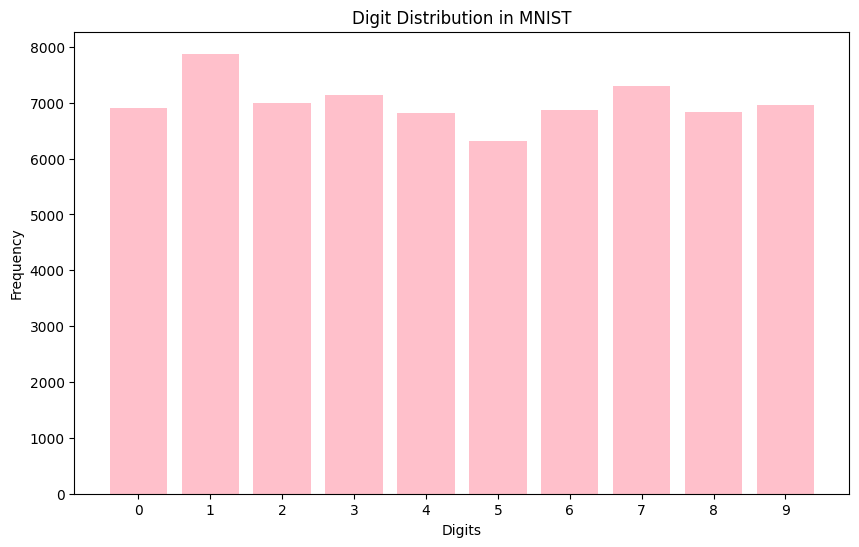

In [ ]:
# Question 2

# Count occurrences of each digit
numbers, counts = np.unique(y, return_counts=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(numbers, counts, color='pink')
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.title('Digit Distribution in MNIST')
plt.xticks(numbers)
plt.show()


The frequencies for each digit are roughly equal, flutuating approx 10% for each digit category, for each digit so the dataset is considered balanced. Source: https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets#:~:text=In%20a%20balanced%20dataset%2C%20the,is%20called%20the%20minority%20class.

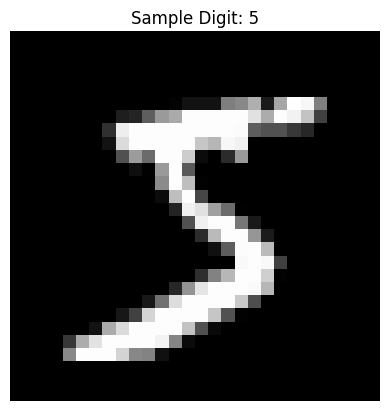

In [ ]:
# Question 3

# Visualize one sample data image with index of 0 and reshape to 2D array with 28 by 28
sample_image = X.iloc[0].values.reshape(28, 28)

plt.imshow(sample_image, cmap='gray')
plt.title(f'Sample Digit: {y[0]}')
plt.axis('off')
plt.show()


In [ ]:
# Question 4

from sklearn.model_selection import train_test_split

TRAIN_RATIO = 0.7
VALID_RATIO = 0.2
TEST_RATIO = 0.1

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=(1-TRAIN_RATIO))

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=((TEST_RATIO/(VALID_RATIO+TEST_RATIO))))

# Check shapes
print(X_train.shape, X_val.shape, X_test.shape)



(48999, 784) (14000, 784) (7001, 784)


Question 5:

The SVM classifier is used to identify the optimal hyperplane in a N-dimenisional space that will seperate the data into different classes. If the data is linearly seperable, it does this by finding the optimal hyperplane by maximizing the seperation margin between classes so that we maximize the distance from the nearest points of any class. However, if the data is not linearly seperable, a special non-linear function called a kernel is used to essentially create new variables, essentially transforming the input space into a higher-dimensional space where we can use a linear hyperplane to seoerate the classes.

In [ ]:
# Question 6

from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create SVM classifier by creating pipeline and standardizing features
svm_classifier = make_pipeline(StandardScaler(), svm.SVC())

# Fit SVM model to training data
svm_classifier.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

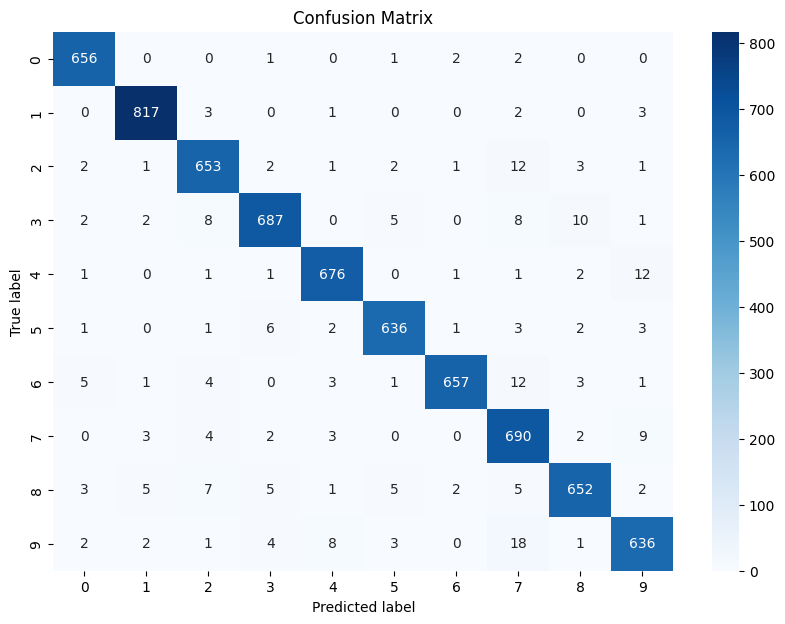

Accuracy: 0.9656
Precision: 0.9659
Recall: 0.9656
F1 Score: 0.9656

SVM Classifier: Evaluation Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       662
           1       0.98      0.99      0.99       826
           2       0.96      0.96      0.96       678
           3       0.97      0.95      0.96       723
           4       0.97      0.97      0.97       695
           5       0.97      0.97      0.97       655
           6       0.99      0.96      0.97       687
           7       0.92      0.97      0.94       713
           8       0.97      0.95      0.96       687
           9       0.95      0.94      0.95       675

    accuracy                           0.97      7001
   macro avg       0.97      0.97      0.97      7001
weighted avg       0.97      0.97      0.97      7001



In [ ]:
# Question 7

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Genearte confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Evaluation metrics
eval_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("SVM Classifier: Evaluation Report")
print(eval_report)


Question 8:

The Random Forest classifier is an ensemble learning method that uses decision trees during training and outputs the mode of the classes (for classification) of the individual trees. Each tree is creating by seleccting random subsets of the training data and features. This makes each tree diverse. Each tree is trained on a bootstrapped sample of the data, which means that some samples may be used multiple times while others may be left out. Each decision tree with be averaged so as to "vote". The votes will be aggregated so that the most voted prediction will then be outputted.

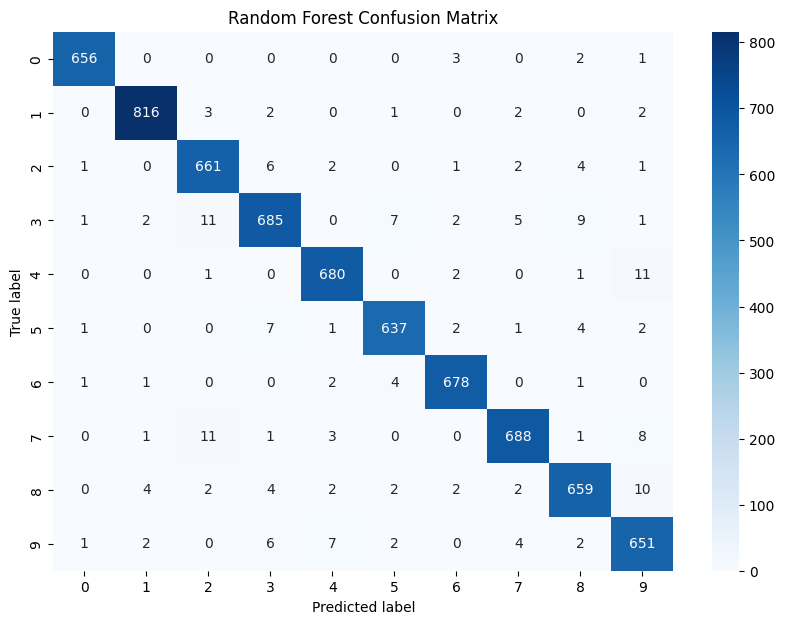

Accuracy: 0.9729
Precision: 0.9729
Recall: 0.9729
F1 Score: 0.9729
Random Forest Classifier: Evaluation Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       662
           1       0.99      0.99      0.99       826
           2       0.96      0.97      0.97       678
           3       0.96      0.95      0.96       723
           4       0.98      0.98      0.98       695
           5       0.98      0.97      0.97       655
           6       0.98      0.99      0.98       687
           7       0.98      0.96      0.97       713
           8       0.96      0.96      0.96       687
           9       0.95      0.96      0.96       675

    accuracy                           0.97      7001
   macro avg       0.97      0.97      0.97      7001
weighted avg       0.97      0.97      0.97      7001



In [ ]:
# Question 9

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_classifier.predict(X_test)

# Confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Plotting confusion matrix for Random Forest
plt.figure(figsize=(10, 7))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Evaluation metrics for Random Forest
rf_eval_report = classification_report(y_test, rf_y_pred)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = recall_score(y_test, rf_y_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')

print(f'Accuracy: {rf_accuracy:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')
print(f'F1 Score: {rf_f1:.4f}\n')
print("Random Forest Classifier: Evaluation Report")
print(rf_eval_report)


Based on the evluation metrics shown, the Random Forest Classifier has better performance in all four metrics: accuracy, precision, recall and F-1 score. This means that the Random Forest model is better at distinguishing between the digits in the MNIST dataset, has fewer false postivie predictions (precision), successfully identifies a great proportion of correct instances of each digit (recall) and is generall more robust, in terms of precision and recall (F1-score).

Although the difference in values are marginal, it is evident that the Random Forest Classifier works better for the MNIST dataset.

It is interesting to note that it seems that both classifiers performed exceptally well on digits 0, 1, and 4, especially the Random Forest who got multiple near perfect results. This makes sense because based on visual inspection, those three digits are quite distinctive and do not hold many similar features to other digits.

The digits that both classifers struggled with were 2, 3, 7, and 9, especially the SVM classifier. This makes sense because based on visual inspection, all four of these digits are kind of similar in their shapes. On a personal note, I even confuse my own mess handwriting, specifically between 2 and 3s and 7 and 9s. It is interesting to see how both models were able to identify these nuances!